In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [6]:
tf.__version__

'2.9.2'

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  print(gpus[0], gpus[1])
  try:
    tf.config.experimental.set_visible_devices(gpus[1], 'GPU')
  except RuntimeError as e:
    # Visible devices must be set at program startup
    print(e)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU') PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')


In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory('./dataset',target_size=(128,128),batch_size=32,class_mode='categorical')
# test_generator = test_datagen.flow_from_directory()

Found 154 images belonging to 4 classes.


In [18]:
resnet_50_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(128,128,3),
    include_top=False,
    weights='imagenet'
)
resnet_50_model.trainable = False

In [19]:
model = tf.keras.Sequential([
    resnet_50_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 20480)             0         
                                                                 
 dense_1 (Dense)             (None, 128)               2621568   
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                                 
Total params: 4,880,068
Trainable params: 2,622,084
Non-trainable params: 2,257,984
_________________________________________________________________


In [25]:
history = model.fit(train_generator, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 382ms/step - loss: 0.3611 - accuracy: 0.8831
Epoch 2/100
5/5 [==============================] - 2s 482ms/step - loss: 0.1874 - accuracy: 0.9351
Epoch 3/100
5/5 [==============================] - 2s 440ms/step - loss: 0.0832 - accuracy: 0.9740
Epoch 4/100
5/5 [==============================] - 2s 419ms/step - loss: 0.0788 - accuracy: 0.9675
Epoch 5/100
5/5 [==============================] - 2s 432ms/step - loss: 0.0658 - accuracy: 0.9675
Epoch 6/100
5/5 [==============================] - 2s 459ms/step - loss: 0.0570 - accuracy: 0.9675
Epoch 7/100
5/5 [==============================] - 2s 466ms/step - loss: 0.0564 - accuracy: 0.9740
Epoch 8/100
5/5 [==============================] - 2s 425ms/step - loss: 0.0681 - accuracy: 0.9610
Epoch 9/100
5/5 [==============================] - 2s 413ms/step - loss: 0.0515 - accuracy: 0.9675
Epoch 10/100
5/5 [==============================] - 2s 459ms/step - loss: 0.0724 - accuracy: 0.9675
Epoch 11/

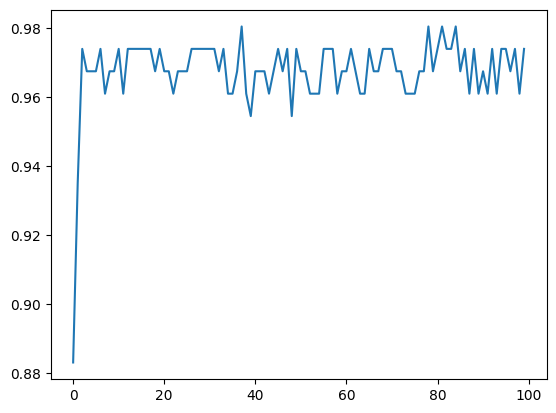

In [26]:
plt.plot(history.history['accuracy'])

In [28]:
model.evaluate(train_generator)     

5/5 [==============================] - 3s 416ms/step - loss: 0.0425 - accuracy: 0.9740


[0.04251250997185707, 0.9740259647369385]

In [27]:
model.save('model.h5')